# Предвиждане на търсенето на споделени велосипеди

## Увод

Системите за споделяне на велосипеди са средство за наемане на велосипеди, при което процесът на получаване на членство, наемане и връщане на велосипеди е автоматизиран чрез мрежа от специално означени местоположения в рамките на даден град. Използвайки тези системи, хората имат възможност да наемат велосипед от едно място и да го върнат на друго място в зависимост от нуждите им. В момента има над 500 програми за споделяне на велосипеди по света.

В този проект ще използваме исторически данни за търсенето на споделени велосипеди в съчетание с метеорологични данни, за да предвидим какво ще бъде търсенето на споделени велосипеди в даден момент от време.

## Преглед на данните

За реализирането на проекта ще използваме следните данни от състезание в Kaggle:
https://www.kaggle.com/competitions/bike-sharing-demand/overview

Те представляват данни за търсенето на споделени велосипеди за периода 2011-2012 година в град Вашингтон за "Capital Bikeshare" програмата. Ето кратко описание на наличните характеристики:

`datetime` – Низ, съдържащ датата и часа с точност до секунда на наблюдението.

`season` – Сезон, когато е направено наблюдението. Индексирани са от 1 за пролет до 4 за зима.

`holiday` – Булева стойност, която показва дали денят е празник.

`workingday` – Булева стойност, която показва дали денят е работен.

`weather` – Променлива, показваща какво е било времето. Индексирана от 1 до 4 като 1 е за слънчево, 2 е за облачно, 3 е за лек дъжд и 4 е за тежък дъжд.

`temp` – Температура на въздуха в Целзий.

`atemp` – “Усещана” температура в Целзий.

`humidity` – Относителна влажност на въздуха в интервала от 0 до 100.

`windspeed` – Скорост на вятъра.

`casual` - Брой на наеманията от нерегистрирани потребители за съответния час.

`registered` - Брой на наемания от регистрирани потребители за съответния час.

`count` - Общ брой на наемания от потребители за съответния час.

Да обърнем внимание, че характеристиките `casual`, `registered` и `count` присъстват само в тренировъчните данни за модела, но не и тестовите. Те са свързани със зависимостта $ count = casual + registered $.

Като крайна цел се стремим да предскажем единствено величината `count`.

Нека да заредим нужните библиотеки за проекта и да прегледаме данните:

In [1]:
import sys
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

Зареждаме данните, с които ще обучаваме модели:

In [2]:
original = pd.read_csv('data/train.csv')
original.head(24)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


Да погледнем размера на данните:

In [3]:
print(original.shape)

(10886, 12)


Имаме много на брой инстанции и не много характеристики. Това най-вероятно ще ни предпази от появата на underfit или overfit.

Да видим малко повече информация за тях:

In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Виждаме, че всички всички колони за числови с изключение на `datetime`. Ще трябва тази колона допълнително да я обработим, за да изкараме информация, която е подходяща за обучение на модели.

Да погледнем също така дали имаме липсващи стойности в данните:

In [5]:
original.isnull().sum().sort_values()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Нямаме липсващи стойности. Съответно това е един проблем по-малко, за който да се тревожим.

Нека да погледнем малко информация за числовите характеристики и да начертаем хистограми:

In [6]:
original.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


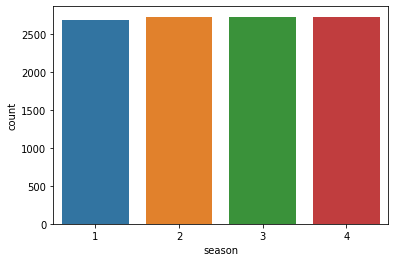

In [7]:
sns.countplot(original["season"]);

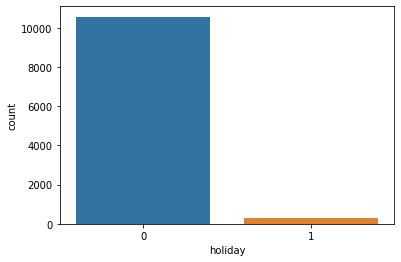

In [8]:
sns.countplot(original["holiday"]);

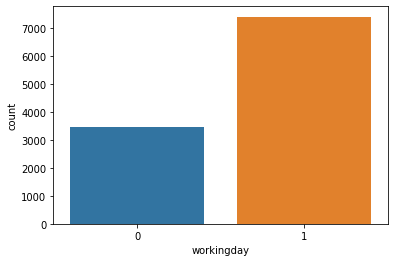

In [9]:
sns.countplot(original["workingday"]);

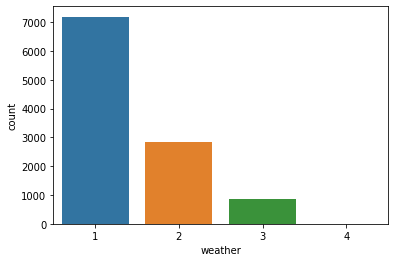

In [10]:
sns.countplot(original["weather"]);

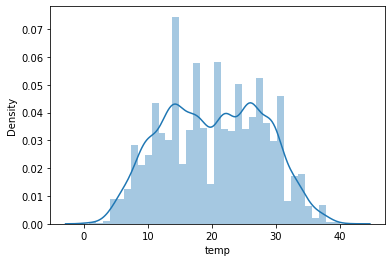

In [11]:
sns.distplot(original["temp"]);

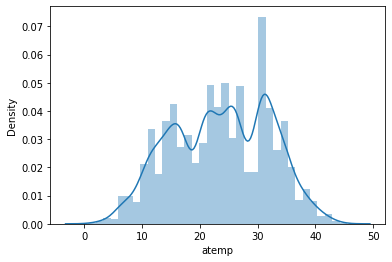

In [12]:
sns.distplot(original["atemp"]);

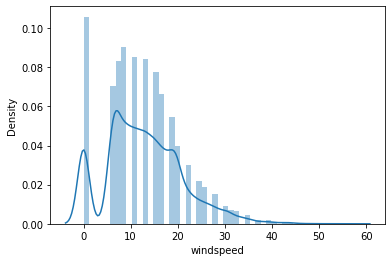

In [13]:
sns.distplot(original["windspeed"]);

Виждаме, че повечето от тях са разпределени сравнително равномерно. Изключение са `holiday` и `weather` при които има доста сериозна асиметрия на данните.

Няма да разглеждаме `casual` и `registered`. Те може да са от полза, ако искаме да обучим два отделни модела и да събираме резултата от тях, за да получим `count`. Това обаче усложнява задачата. За целите на проекта е достатъчно да обучим един модел, които да предсказва директно `count`.

Нека да резгледаме величината `count`, която ще предсказваме. 

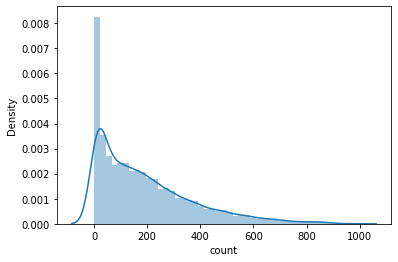

In [14]:
sns.distplot(original["count"]);

Изглежда има сериозна асиметрия, тъй като много стойности са концентрирани около нулата. Да пробваме да преобразуваме величината.

Първо да пробваме да я логаритмуваме:

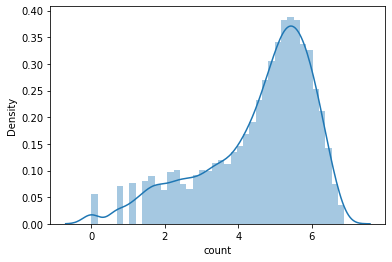

In [15]:
sns.distplot(np.log(original["count"]));

Вече изглежда по-равномерно разпределена.

Да пробваме и с коренуване:

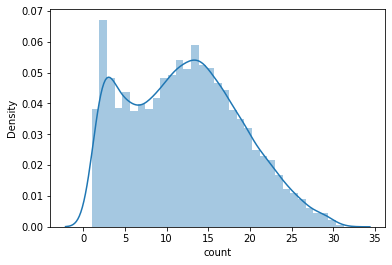

In [16]:
sns.distplot(np.sqrt(original["count"]));

Тези графики изглеждат по-равномерни. Може да се опитаме да предскажем тях вместо оригиналната стойност и да видим дали ще получим по-добри резултати.

In [17]:
target = original["count"]
target_log = np.log(original["count"])
target_sqrt = np.sqrt(original["count"])

## Метрики за оценка на моделите

Сега трябва да изберем метрика, по която ще оценяваме колко добри са моделите.

Основно ще използваме `R-squared` метриката, която е стандартна при регресия. Освен това може да пробваме и с `Root Mean Squared Logarithmic Error (RMSLE)`, тъй като тази метрика се използва при оценките на заданието в Kaggle.

Освен това ще си дефинираме вариаци на тях, които допълнително преобразуват данните в случай, че използваме логаритмуване или коренуване на очаквания резултат. При RMSLE е задължително да бъдат подавани неотрицателни стойности при оценка на грешката. Поради тази причина в дефинираните оценки за стандартна и коренувана версия автоматично ще преобразуваме отрицателните стойности до 0.

Също така за RMSLE искаме по-малките стойности да са по-добри. Затова имаме параметър $ greater\_is\_better=False $, който ги взима с отрицателна стойност (тоест ги разглежда като загуба - loss).

In [18]:
from sklearn.metrics import r2_score, mean_squared_log_error, make_scorer

r2 = make_scorer(lambda y_true, y_pred, **kwargs: r2_score(y_true, y_pred))
r2_log = make_scorer(lambda y_true, y_pred, **kwargs: r2_score(np.exp(y_true), np.exp(y_pred)))
r2_sqrt = make_scorer(lambda y_true, y_pred, **kwargs: r2_score(np.power(y_true, 2), np.power(np.maximum(y_pred, 0), 2)))

rmsle = make_scorer(lambda y_true, y_pred, **kwargs: np.sqrt(mean_squared_log_error(y_true, np.maximum(y_pred, 0))), greater_is_better=False)
rmsle_log = make_scorer(lambda y_true, y_pred, **kwargs: np.sqrt(mean_squared_log_error(np.exp(y_true), np.exp(y_pred))), greater_is_better=False)
rmsle_sqrt = make_scorer(lambda y_true, y_pred, **kwargs: np.sqrt(mean_squared_log_error(np.power(y_true, 2), np.power(np.maximum(y_pred, 0), 2))), greater_is_better=False)

## Инжинерство на характеристиките

Трябва да проебразуваме характеристиките до вид, в който може моделите да извлекат полезна информация от тях. Нека да си отделим тези характеристики, по които ще тренираме моделите.

In [19]:
train = original.drop(columns=["count", "casual", "registered"])

Единствената нечислова характеристика е `datetime`. Засега ще я оставим настрани и после ще видим как може да извлечем информация от нея.

In [20]:
train_without_datetime = train.drop(columns=["datetime"])

Да разделим данните на тренировъчни и тестови и да видим как се спрамя базов линеен модел с числовите характеристики засега.

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_without_datetime, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

In [22]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [23]:
linear_regressor.fit(x_train, y_train)
print("R-squared score: ", r2(linear_regressor, x_test, y_test))

linear_regressor.fit(x_train, y_train_log)
print("R-squared score with log: ", r2_log(linear_regressor, x_test, y_test_log))

linear_regressor.fit(x_train, y_train_sqrt)
print("R-squared score with sqrt: ", r2_sqrt(linear_regressor, x_test, y_test_sqrt))

R-squared score:  0.26553301207099445
R-squared score with log:  0.08291262349745832
R-squared score with sqrt:  0.23794496363577222


Оценките са ниски. Това е очаквано, понеже напълно игнорираме часа, което е доста значима характеристика. Все пак резултатите са по-големи от 0, което означава, че се намира някаква зависимост в данните. Да разгледаме и RMSLE оценките:

In [24]:
linear_regressor.fit(x_train, y_train)
print("RMSLE score: ", rmsle(linear_regressor, x_test, y_test))

linear_regressor.fit(x_train, y_train_log)
print("RMSLE score with log: ", rmsle_log(linear_regressor, x_test, y_test_log))

linear_regressor.fit(x_train, y_train_sqrt)
print("RMSLE score with sqrt: ", rmsle_sqrt(linear_regressor, x_test, y_test_sqrt))

RMSLE score:  -1.4489640897383254
RMSLE score with log:  -1.2207378392178587
RMSLE score with sqrt:  -1.2758765282079028


Нека направим помощтна функция, която да ни показва тази информация за произволни регресори. Тя използва подадените train характеристики и глобалната target целева стойност, на които автоматично им прави `train_test_split`. Идеята зад това е, че ще ни се наложи да пробваме няколко различни представяния на характеристиките и ни трябва лесен начин да сменяме представянето.

In [25]:
def score_regressor(regressor, trainData):
    x_train, x_test, y_train, y_test = train_test_split(trainData, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    y_train_sqrt = np.sqrt(y_train)
    y_test_sqrt = np.sqrt(y_test)
    
    regressor.fit(x_train, y_train)
    print("R-squared score: ", r2(regressor, x_test, y_test))
    print("RMSLE score: ", rmsle(regressor, x_test, y_test))

    regressor.fit(x_train, y_train_log)
    print("R-squared score with log: ", r2_log(regressor, x_test, y_test_log))
    print("RMSLE score with log: ", rmsle_log(regressor, x_test, y_test_log))

    regressor.fit(x_train, y_train_sqrt)
    print("R-squared score with sqrt: ", r2_sqrt(regressor, x_test, y_test_sqrt))
    print("RMSLE score with sqrt: ", rmsle_sqrt(regressor, x_test, y_test_sqrt))

In [26]:
print("Linear regressor:\n")
score_regressor(linear_regressor, train_without_datetime)

Linear regressor:

R-squared score:  0.26553301207099445
RMSLE score:  -1.4489640897383254
R-squared score with log:  0.08291262349745832
RMSLE score with log:  -1.2207378392178587
R-squared score with sqrt:  0.23794496363577222
RMSLE score with sqrt:  -1.2758765282079028


In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(random_state = 1, n_estimators = 100, min_samples_split = 10, max_depth = 40)

In [28]:
print("Forest regressor:\n")
score_regressor(forest_regressor, train_without_datetime)

Forest regressor:

R-squared score:  0.34194194264824995
RMSLE score:  -1.2682355396351437
R-squared score with log:  0.24485096443466192
RMSLE score with log:  -1.1541489427769875
R-squared score with sqrt:  0.33116046867119797
RMSLE score with sqrt:  -1.1803316795960686


Получаваме малко по-добри резултати, но пак са зле като цяло. Нека да започнем с обработката на характеристиките.

### Season и Weather

Един от проблемите е, че `season` и `weather` са въведени като числови характеристики, но смисъла им е на категорийни. Това не е особен проблем за алгоритми като дърветата, но за линейната регресия и сродните ѝ е проблем. Поради тази причина ще направим `One Hot Encoding` на тези две характеристики.

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
encoder = OneHotEncoder()
data = encoder.fit_transform(train[["season", "weather"]])
train[["spring", "summer", "autumn", "winter", "clear", "cloudy", "lightRain", "heavyRain"]] = data.todense()
train.drop(columns=["season", "weather"], inplace=True)
train_without_datetime = train.drop(columns=["datetime"])

In [31]:
train

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,autumn,winter,clear,cloudy,lightRain,heavyRain
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


Да направим ново разделение на данните и да видим дали има подобрение в моделите:

In [32]:
print("Linear regressor:\n")
score_regressor(linear_regressor, train_without_datetime)

Linear regressor:

R-squared score:  0.2761448609990269
RMSLE score:  -1.4402780883063537
R-squared score with log:  0.0905762944021109
RMSLE score with log:  -1.208367278700933
R-squared score with sqrt:  0.2503093437388223
RMSLE score with sqrt:  -1.2645266072154573


In [33]:
print("Forest regressor:\n")
score_regressor(forest_regressor, train_without_datetime)

Forest regressor:

R-squared score:  0.34219589071063183
RMSLE score:  -1.2685339651002228
R-squared score with log:  0.2481628031434583
RMSLE score with log:  -1.153377994735968
R-squared score with sqrt:  0.3314871683566488
RMSLE score with sqrt:  -1.180541259329425


Очаквано за линейната регресия има малко подобрение, докато за гората изглежда няма подобрение след `One Hot Encoding`.

### Datetime

Остава да извлечем полезна информация от `datetime` характеристиката. За целта трябва по някакъв начин да я преобразуваме в числови характеристики, които да използваме.

Да забележим, че имаме 2 вида периодичност, които можем да извлечем. Единият е часът, които циклично се променя от 00:00:00 до 23:59:59. Другият вид периодичност е денят от годината, който циклично се променя от 01.01 до 31.12. Накрая остава и годината. Нея има смисъл да я отделим като отделна характеристика, понеже е възможно в различните години търсенето на велосипеди постепенно да се е променило.

Ще пробваме няколко начина да преобразуваме `datetime` в смислени числени характеристики.

#### Линейна трансформация в интервала [0,1]

Идеята е проста. Ще транформираме датата до число в интервала [0,1] в зависимост от това кога през годината е и ще направим същото и за часа. За целта си съставяме помощна функция:

In [34]:
def transform_datetime_to_intervals_01(datetime):
    splitDateTime = datetime.apply(lambda x: x.split(" "))
    splitDate = splitDateTime.apply(lambda x: x[0])
    splitDate = splitDate.apply(lambda x: x.split("-"))
    splitTime = splitDateTime.apply(lambda x: x[1])
    splitTime = splitTime.apply(lambda x: x.split(":"))
    
    month = np.array(pd.to_numeric(splitDate.apply(lambda x: x[1])))
    day = np.array(pd.to_numeric(splitDate.apply(lambda x: x[2])))
    hour = np.array(pd.to_numeric(splitTime.apply(lambda x: x[0])))
    minute = np.array(pd.to_numeric(splitTime.apply(lambda x: x[1])))
    second = np.array(pd.to_numeric(splitTime.apply(lambda x: x[2])))
    
    dateInterval = (month - 1) / 12 + (day - 1) / 365
    timeInterval = hour / 24 + minute / 1440 + second / 86400
    
    df = pd.DataFrame()
    df["year"] = pd.to_numeric(splitDate.apply(lambda x: x[0]))
    df["dayInterval"] = dateInterval
    df["timeInterval"] = timeInterval
    
    return df

In [35]:
transform_datetime_to_intervals_01(train["datetime"])

,year,dayInterval,timeInterval
0,2011,0.000000,0.000000
1,2011,0.000000,0.041667
2,2011,0.000000,0.083333
3,2011,0.000000,0.125000
4,2011,0.000000,0.166667
...,...,...,...
10881,2012,0.965982,0.791667
10882,2012,0.965982,0.833333
10883,2012,0.965982,0.875000
10884,2012,0.965982,0.916667


Обновяваме характеристиките:

In [36]:
train_01 = train.drop(columns=["datetime"])
train_01[["year", "dayInterval", "timeInterval"]] = transform_datetime_to_intervals_01(train["datetime"])

Да изпробваме дали има подобрение на оценките:

In [37]:
print("Linear regressor:\n")
score_regressor(linear_regressor, train_01)

Linear regressor:

R-squared score:  0.4026882245979858
RMSLE score:  -1.2911979076375095
R-squared score with log:  0.19543065199372878
RMSLE score with log:  -1.0071576051940139
R-squared score with sqrt:  0.3847534601905671
RMSLE score with sqrt:  -1.0593849586640256


In [38]:
print("Forest regressor:\n")
score_regressor(forest_regressor, train_01)

Forest regressor:

R-squared score:  0.9394447637697447
RMSLE score:  -0.35325606792603365
R-squared score with log:  0.9305560380333141
RMSLE score with log:  -0.337280215057499
R-squared score with sqrt:  0.9362345945929514
RMSLE score with sqrt:  -0.3422837922464613


Виждаме, че при гората вече имаме много добри резултати. При линейната регресия също имаме малко подобрение, но резултатите все още са лоши. Това може да се дължи на факта, че представянето не отразява цикличността на деня. Например часовете 00:00:00 и 23:00:00 са много близко един до друг, но при тази трансформация те попадат около 0 и съответно около 1, което означава, че са много раздалечени. Освен това и двете са около полунощ, докато най-натоварените часове се падат някъде около средата на интервала. В тази ситуация линейната регресия се озовава в дилема - ако даде ниско тегло на `dayInterval`, за да запази часовете около полунощ с малко търсене, то няма да предскаже правилно часовете около пладне. Ако пък даде голямо тегло, за да предвиди правилно часовете около пладне, то часовете точно преди полунощ ще получат твърде голяма оценка. За решаването на този проблем трябва да пробваме други трансформации на `datetime`.

#### Циклична трансформация в единичната окръжност

Тук идеята е да трансформираме денят от годината и часа линейно до ъгъл в единичната окръжност. След това да вземем X и Y координатите на получената точка и да ги използваме като характеристики. Чрез това представяне вече близките часове и дати винаги се трансформират до близки точки.

Да пробваме тази трансформация:

In [39]:
def transform_datetime_to_cycles(datetime):
    splitDateTime = datetime.apply(lambda x: x.split(" "))
    splitDate = splitDateTime.apply(lambda x: x[0])
    splitDate = splitDate.apply(lambda x: x.split("-"))
    splitTime = splitDateTime.apply(lambda x: x[1])
    splitTime = splitTime.apply(lambda x: x.split(":"))
    
    month = np.array(pd.to_numeric(splitDate.apply(lambda x: x[1])))
    day = np.array(pd.to_numeric(splitDate.apply(lambda x: x[2])))
    hour = np.array(pd.to_numeric(splitTime.apply(lambda x: x[0])))
    minute = np.array(pd.to_numeric(splitTime.apply(lambda x: x[1])))
    second = np.array(pd.to_numeric(splitTime.apply(lambda x: x[2])))
    
    dateInterval = (month - 1) / 12 + (day - 1) / 365
    timeInterval = hour / 24 + minute / 1440 + second / 86400
    
    xDate = np.cos(dateInterval * 2 * np.pi)
    yDate = np.sin(dateInterval * 2 * np.pi)
    xTime = np.cos(timeInterval * 2 * np.pi)
    yTime = np.sin(timeInterval * 2 * np.pi)
    
    df = pd.DataFrame()
    df["year"] = pd.to_numeric(splitDate.apply(lambda x: x[0]))
    df["xDate"] = xDate
    df["yDate"] = yDate
    df["xTime"] = xTime
    df["yTime"] = yTime
    
    return df

In [40]:
transform_datetime_to_cycles(train["datetime"])

,year,xDate,yDate,xTime,yTime
0,2011,1.000000,0.000000,1.000000,0.000000
1,2011,1.000000,0.000000,0.965926,0.258819
2,2011,1.000000,0.000000,0.866025,0.500000
3,2011,1.000000,0.000000,0.707107,0.707107
4,2011,1.000000,0.000000,0.500000,0.866025
...,...,...,...,...,...
10881,2012,0.977244,-0.212119,0.258819,-0.965926
10882,2012,0.977244,-0.212119,0.500000,-0.866025
10883,2012,0.977244,-0.212119,0.707107,-0.707107
10884,2012,0.977244,-0.212119,0.866025,-0.500000


Обновяваме характеристиките:

In [41]:
train_cycles = train.drop(columns=["datetime"])
train_cycles[["year", "xDate", "yDate", "xTime", "yTime"]] = transform_datetime_to_cycles(train["datetime"])

Да проверим дали има подобрение:

In [42]:
print("Linear regressor:\n")
score_regressor(linear_regressor, train_cycles)

Linear regressor:

R-squared score:  0.5154777456416313
RMSLE score:  -1.1435688490206029
R-squared score with log:  0.2561029026416112
RMSLE score with log:  -0.8798684927521476
R-squared score with sqrt:  0.5034428311020753
RMSLE score with sqrt:  -0.8801303804382692


In [43]:
print("Forest regressor:\n")
score_regressor(forest_regressor, train_cycles)

Forest regressor:

R-squared score:  0.9392519562068566
RMSLE score:  -0.35596945228238447
R-squared score with log:  0.9318627400305983
RMSLE score with log:  -0.3394595731092309
R-squared score with sqrt:  0.9366245628273621
RMSLE score with sqrt:  -0.347894420636454


Виждаме, че при линейната регресия има известно подобрение. Оценката при гората не се е променила особено, тъй като пак получаваме много подобни резултати. Изглежда това представяне е за предпочитане пред вкарването в интервали [0,1].

#### Групиране на данните в интервали

In [44]:
train_binned = train_01.copy()

for i in range(1, 13):
    name = "month " + str(i)
    train_binned[name] = (train_binned["dayInterval"] < i / 12) & (train_binned["dayInterval"] >= (i-1) / 12)

for i in range(0, 24):
    name = str(i) + "-" + str(i + 1) + "h"
    train_binned[name] = (train_binned["timeInterval"] < (i+1) / 24) & (train_binned["timeInterval"] >= i / 24)
    
train_binned.drop(columns=["dayInterval", "timeInterval"], inplace = True)

In [45]:
train_binned

,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,autumn,winter,...,14-15h,15-16h,16-17h,17-18h,18-19h,19-20h,20-21h,21-22h,22-23h,23-24h
0,0,0,9.84,14.395,81,0.0000,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0,0,9.02,13.635,80,0.0000,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,9.02,13.635,80,0.0000,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,9.84,14.395,75,0.0000,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,9.84,14.395,75,0.0000,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,0.0,0.0,0.0,1.0,...,False,False,False,False,False,True,False,False,False,False
10882,0,1,14.76,17.425,57,15.0013,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,True,False,False,False
10883,0,1,13.94,15.910,61,15.0013,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False
10884,0,1,13.94,17.425,61,6.0032,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False


Да проверим дали има подобрение:

In [46]:
print("Linear regressor:\n")
score_regressor(linear_regressor, train_binned)

Linear regressor:

R-squared score:  0.6852680416391386
RMSLE score:  -1.0904384823719377
R-squared score with log:  0.7079043433726253
RMSLE score with log:  -0.5933815237697706
R-squared score with sqrt:  0.7304034010572924
RMSLE score with sqrt:  -0.740703699235039


In [47]:
print("Forest regressor:\n")
score_regressor(forest_regressor, train_binned)

Forest regressor:

R-squared score:  0.9098899672634994
RMSLE score:  -0.49201367435843313
R-squared score with log:  0.9191293009096748
RMSLE score with log:  -0.3605471439376388
R-squared score with sqrt:  0.916006600991015
RMSLE score with sqrt:  -0.38456164141423577


При линейната регресия имаме подобрение. За сметка на това обаче при гората имаме известно влошаване. Това най-вероятно се дължи на факта, че имаме твърде много загуба на информация, тъй като нямаме ясна подредба на отделните времеви интервали. Например при представянията с интервал [0,1] и единична окръжност месеците януари и февруари са много близко един до друг и при необходимост може да се прави екстраполация между тях, особено ако датата е на границата между двата месеца. При разделянето на групи обаче те ще съответстват на съвсем различни стойности. Януари ще е толкова близо до февруари, колкото до юни. Това може да попречи на моделите да направят достатъчно добра оценка.

#### Заключение

Като заключение може да се каже, че трансформацията в единичната окръжност и групирането в интервали са две подходящи представяния. Видяхме, че всяко от тях може да има предимство пред другото в зависимост от това кой алгоритъм използваме. Поради тази причина ще пробваме и двете представяния и ще сравним резултатите. Също така трансформацията в интервал [0,1] изглежда също е подходяща при дърветата. Може допълнително да я разгледаме за тях.

## Скалиране на данните

За момента пробвахме линайна регресия и гора върху данните. Това са алгоритми, които не зависят от мащаба на отделните характеристики. За повечето от другите алгоритми, които ще пробваме, мащабът е от значение. Да тренираме `K Neighbors Regressor`, за да видим нуждата от скалиране.

In [48]:
from sklearn.neighbors import KNeighborsRegressor

kneighbours_regressor = KNeighborsRegressor(5)

Да го тренираме върху трансформацията с единичната окръжност:

In [49]:
print("KNeighbors Regressor\n")
score_regressor(kneighbours_regressor, train_cycles)

KNeighbors Regressor

R-squared score:  0.3089112387396099
RMSLE score:  -1.2251753732450512
R-squared score with log:  0.23540537354604973
RMSLE score with log:  -1.1512837560809408
R-squared score with sqrt:  0.3004493930134794
RMSLE score with sqrt:  -1.1615036113903336


Резултатите са много зле. Причината за това е, че характеристики като `temp`, `atemp` и `windspeed` имат много по-големи стойности от останалите характеристики и внасят твърде много шум в резултата.

Да се опитаме да прекараме характеристиките през `Min-Max Scaler`:

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_01_scaled = MinMaxScaler().fit_transform(train_01)
train_cycles_scaled = MinMaxScaler().fit_transform(train_cycles)
train_binned_scaled = MinMaxScaler().fit_transform(train_binned)

In [51]:
print("KNeighbors Regressor\n")
score_regressor(kneighbours_regressor, train_cycles_scaled)

KNeighbors Regressor

R-squared score:  0.8731765254981337
RMSLE score:  -0.48934229850706584
R-squared score with log:  0.8622388111799655
RMSLE score with log:  -0.4283699954102072
R-squared score with sqrt:  0.87138341417782
RMSLE score with sqrt:  -0.44635951087316994


Вече имаме значително по-добри резултати.

## Изпробване на различни алгоритми

Тук вече ще погледнем по-подробно как се представят различни алгоритми и какви стойности от параметри за резуларизация дават добри стойности. Съответно ще използваме резултатите от това изследване, за да подберем подходящи параметри, които да подадем на Grid Search. Нека си създадем списъци `grid_01`, `grid_cycles` и `grid_binned`, в който ще натрупваме параметрите, които мислим да изпробваме. Във всеки grid ще добавяме параметри за тези алгоритми, които работят добре с това представяне. По този начин ще си спестим ненужни проверки за представяния, които не работят добре със съответния алгоритъм.

In [52]:
grid_01 = []
grid_cycles = []
grid_binned = []

### Линейна регресия, Ridge и Lasso

Вече направихме доста опити с линейна регресия. Видяхме, че представянето с групиране в интервали дава най-добри резултати, така че ще изпробваме него. Освен това ще правим опити със скалирана версия на данните. За линейната регресия това е без значение, но за `Ridge` и `Lasso` мащабът на данните е важен, защото това определя относителната големина на теглата, които участват в регуларизацията. Трябва за `Ridge` и `Lasso` да видим кой стойности на параметъра `alpha` има смисъл да изпробваме.

Нека отново да пуснем линейната регресия като база за сравнение:

In [53]:
score_regressor(linear_regressor, train_binned_scaled)

R-squared score:  0.6853097740928888
RMSLE score:  -1.0902360848635582
R-squared score with log:  0.7079270102364681
RMSLE score with log:  -0.5933852924098119
R-squared score with sqrt:  0.7306114829544913
RMSLE score with sqrt:  -0.7412578206486512


Ще пробваме с `Ridge` и `Lasso`. За целта ще си направим помощна функция, която да оценява `R-squared` оценките при подадени алфи.

In [54]:
from sklearn.linear_model import Ridge, Lasso

def test_ridge_with_alphas(alphas):
    x_train, x_test, y_train, y_test = train_test_split(train_binned_scaled, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    y_train_sqrt = np.sqrt(y_train)
    y_test_sqrt = np.sqrt(y_test)
    
    for a in alphas:
        print("alpha = " + str(a))
        ridge = Ridge(alpha = a).fit(x_train, y_train)
        print("R-squared score over test: " + str(r2(ridge, x_test, y_test)))
        ridge = Ridge(alpha = a).fit(x_train, y_train_log)
        print("R-squared score over test with log: " + str(r2_log(ridge, x_test, y_test_log)))
        ridge = Ridge(alpha = a).fit(x_train, y_train_sqrt)
        print("R-squared score over test with sqrt: " + str(r2_sqrt(ridge, x_test, y_test_sqrt)) + "\n")
        
def test_lasso_with_alphas(alphas):
    x_train, x_test, y_train, y_test = train_test_split(train_binned_scaled, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    y_train_sqrt = np.sqrt(y_train)
    y_test_sqrt = np.sqrt(y_test)
    
    for a in alphas:
        print("alpha = " + str(a))
        lasso = Lasso(alpha = a).fit(x_train, y_train)
        print("R-squared score over test: " + str(r2(lasso, x_test, y_test)))
        lasso = Lasso(alpha = a).fit(x_train, y_train_log)
        print("R-squared score over test with log: " + str(r2_log(lasso, x_test, y_test_log)))
        lasso = Lasso(alpha = a).fit(x_train, y_train_sqrt)
        print("R-squared score over test with sqrt: " + str(r2_sqrt(lasso, x_test, y_test_sqrt)) + "\n")

In [55]:
test_ridge_with_alphas([1, 10, 50, 100, 300, 1000])

alpha = 1
R-squared score over test: 0.6853792111689299
R-squared score over test with log: 0.7078081056668466
R-squared score over test with sqrt: 0.7301023998681954

alpha = 10
R-squared score over test: 0.6857147732474982
R-squared score over test with log: 0.7057586565269915
R-squared score over test with sqrt: 0.7269415218769426

alpha = 50
R-squared score over test: 0.6805921577686829
R-squared score over test with log: 0.6788303988234586
R-squared score over test with sqrt: 0.7080063748999761

alpha = 100
R-squared score over test: 0.6663746721906012
R-squared score over test with log: 0.6297274302741058
R-squared score over test with sqrt: 0.6798352271471877

alpha = 300
R-squared score over test: 0.5920834822481895
R-squared score over test with log: 0.4436781511334792
R-squared score over test with sqrt: 0.5716141975561979

alpha = 1000
R-squared score over test: 0.41550817285569897
R-squared score over test with log: 0.1348904453673917
R-squared score over test with sqrt: 0.

Явно с `Ridge` няма да успеем да направим подобрение. Да погледнем и теглата на отделните характеристики при $ alpha = 10 $:

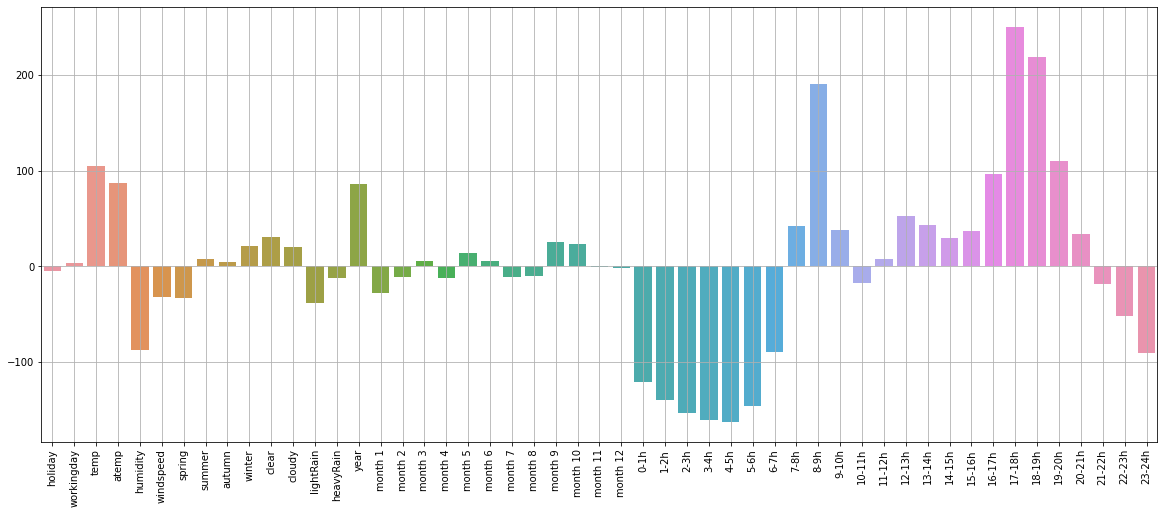

In [56]:
x_train, x_test, y_train, y_test = train_test_split(train_binned_scaled, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

regressor = Ridge(alpha = 10).fit(x_train, y_train)

plt.figure(figsize=(20,8))
barplot = sns.barplot(x=train_binned.columns, y=regressor.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90); plt.grid(True);

Изглежда сутринта и следобяд има голямо търсене. Това е очаквано, понеже тогава хората отиват и се връщат от работа. Също така през нощта има малко търсене, което също е очаквано. Интересно е, че годината има положително тегло. Явно велосипедите са станали по-популярни през 2012 година в сравнение с 2011. За сметка на това месеците и сезоните нямат особено голям принос. Други забележими характеристики са температурата, скоростта на вятъра и влажността. Явно по-топлото време окуражава хората да карат велосипеди, докато вятъра и влажността ги разубеждават.

Да пробваме и с `Lasso`:

In [57]:
test_lasso_with_alphas([0.01, 0.03, 0.1, 0.3, 1, 10])

alpha = 0.01
R-squared score over test: 0.6853466335027839
R-squared score over test with log: 0.6311419399489728
R-squared score over test with sqrt: 0.7239172454505534

alpha = 0.03
R-squared score over test: 0.6855062453155274
R-squared score over test with log: 0.3303919117496422
R-squared score over test with sqrt: 0.7020001037301868

alpha = 0.1
R-squared score over test: 0.6859254246137929
R-squared score over test with log: -0.2397197968400211
R-squared score over test with sqrt: 0.5918981117035744

alpha = 0.3
R-squared score over test: 0.6858026336808067
R-squared score over test with log: -0.30391842079846776
R-squared score over test with sqrt: 0.1822998724747188

alpha = 1
R-squared score over test: 0.6712754152252036
R-squared score over test with log: -0.30391842079846776
R-squared score over test with sqrt: -0.07177859616920235

alpha = 10
R-squared score over test: 0.16396895854160254
R-squared score over test with log: -0.30391842079846776
R-squared score over test wi

Явно и `Lasso` не дава подобрение. Все пак ще ги вкараме в `grid_binned`, тъй като се обучават бързо и няма да доведат до ненужно забавяне:

In [58]:
linear_regression_parameters = {
    'regressor': [LinearRegression()],
    'preprocessing': [MinMaxScaler()],
}

ridge_parameters = {
    'regressor': [Ridge()],
    'preprocessing': [StandardScaler(), MinMaxScaler()],
    'regressor__alpha': [0.5, 1, 3, 7, 10, 20, 60, 100],
}

lasso_parameters = {
    'regressor': [Lasso()],
    'preprocessing': [StandardScaler(), MinMaxScaler()],
    'regressor__alpha': [0.001, 0.003, 0.006, 0.01, 0.2, 0.4, 0.7, 1, 5],
}

grid_binned.append(linear_regression_parameters)
grid_binned.append(ridge_parameters)
grid_binned.append(lasso_parameters)

### Random Forest Regressor

За гората също направихме тестове, докато обработвахме характеристиките. Видяхме, че цикличното представяне дава добри резултати. Нека използваме него. Ще кои стойности на параметрите за регуларизация има смисъл да изпробваме:

In [59]:
def test_forest_with_parameters(maxDepths = [1000], minSamples = [2]):
    x_train, x_test, y_train, y_test = train_test_split(train_cycles_scaled, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    y_train_sqrt = np.sqrt(y_train)
    y_test_sqrt = np.sqrt(y_test)
    
    for d in maxDepths:
        for s in minSamples: 
            print("Max depth = " + str(d) + ", Min samples = " + str(s))
            forest = RandomForestRegressor(max_depth = d, min_samples_split = s).fit(x_train, y_train)
            print("R-squared score over test: " + str(r2(forest, x_test, y_test)))
            forest = RandomForestRegressor(max_depth = d, min_samples_split = s).fit(x_train, y_train_log)
            print("R-squared score over test with log: " + str(r2_log(forest, x_test, y_test_log)))
            forest = RandomForestRegressor(max_depth = d, min_samples_split = s).fit(x_train, y_train_sqrt)
            print("R-squared score over test with sqrt: " + str(r2_sqrt(forest, x_test, y_test_sqrt)) + "\n")

Понеже имаме 2 параметъра, възможните комбинации стават много на брой. Ще тестваме двата параметъра поотделно, за да видим в какви граници има смисъл да ги изменяме, а комбинирането им ще оставим на Grid Search.

In [60]:
test_forest_with_parameters(maxDepths = [5, 10, 20, 50, 100])

Max depth = 5, Min samples = 2
R-squared score over test: 0.7368102879813541
R-squared score over test with log: 0.6584361131899383
R-squared score over test with sqrt: 0.711520728582199

Max depth = 10, Min samples = 2
R-squared score over test: 0.932193219919799
R-squared score over test with log: 0.9077269227150979
R-squared score over test with sqrt: 0.9202447974700363

Max depth = 20, Min samples = 2
R-squared score over test: 0.9427310899704834
R-squared score over test with log: 0.9358977232097897
R-squared score over test with sqrt: 0.9399039783791182

Max depth = 50, Min samples = 2
R-squared score over test: 0.9435801539285004
R-squared score over test with log: 0.9351218566171766
R-squared score over test with sqrt: 0.9400197360558981

Max depth = 100, Min samples = 2
R-squared score over test: 0.9439182642755557
R-squared score over test with log: 0.9354668347138773
R-squared score over test with sqrt: 0.939138508686089



Изглежда за гората по-голяма дълбочина е за предпочитане. Да пробваме и с ограничаване на възможността за разделяне:

In [61]:
test_forest_with_parameters(minSamples = [2, 5, 10, 20, 50, 100])

Max depth = 1000, Min samples = 2
R-squared score over test: 0.9426980743604284
R-squared score over test with log: 0.9362285671810955
R-squared score over test with sqrt: 0.9389091367945195

Max depth = 1000, Min samples = 5
R-squared score over test: 0.9424902484897226
R-squared score over test with log: 0.9336346601340783
R-squared score over test with sqrt: 0.9385369453465447

Max depth = 1000, Min samples = 10
R-squared score over test: 0.939512936634312
R-squared score over test with log: 0.9303375923879745
R-squared score over test with sqrt: 0.9351684503529062

Max depth = 1000, Min samples = 20
R-squared score over test: 0.9322854492633563
R-squared score over test with log: 0.9242582572290764
R-squared score over test with sqrt: 0.9286938919375184

Max depth = 1000, Min samples = 50
R-squared score over test: 0.908836639351559
R-squared score over test with log: 0.9006799258653884
R-squared score over test with sqrt: 0.9043134665032208

Max depth = 1000, Min samples = 100
R-s

Изглежда допълнителната регуларизация не дава особено подобрение. Все пак ще вкараме в `grid_01` и `grid_cycles` съответните параметри, които искаме да изпробваме:

In [62]:
random_forest_parameters = {
    'regressor': [RandomForestRegressor(n_estimators=100)],
    'preprocessing': [MinMaxScaler()],
    'regressor__max_depth': [5, 10, 15, 20, 30, 40, 50, 70, 100],
    'regressor__min_samples_split': [2, 4, 7, 10, 15, 20, 30, 40, 50, 70]
}

grid_01.append(random_forest_parameters)
grid_cycles.append(random_forest_parameters)

### K Neighbors Regressor

Нека да пробваме и с K най-близки съседи. За него не сме правили много експерименти, поради което първо ще пробваме кое представяне на характеристиките дава най-добър резултат.

In [63]:
kneighbors = KNeighborsRegressor(n_neighbors = 5)

In [64]:
score_regressor(kneighbors, train_01_scaled)

R-squared score:  0.7563243599677248
RMSLE score:  -0.6918247180282324
R-squared score with log:  0.7364952027172824
RMSLE score with log:  -0.6117910989938024
R-squared score with sqrt:  0.7543806831825983
RMSLE score with sqrt:  -0.6354261920916034


In [65]:
score_regressor(kneighbors, train_cycles_scaled)

R-squared score:  0.8731765254981337
RMSLE score:  -0.48934229850706584
R-squared score with log:  0.8622388111799655
RMSLE score with log:  -0.4283699954102072
R-squared score with sqrt:  0.87138341417782
RMSLE score with sqrt:  -0.44635951087316994


In [66]:
score_regressor(kneighbors, train_binned_scaled)

R-squared score:  0.8171431252363057
RMSLE score:  -0.5888984054286638
R-squared score with log:  0.8058699495743191
RMSLE score with log:  -0.5339380012520124
R-squared score with sqrt:  0.8169507818512065
RMSLE score with sqrt:  -0.5505123547569587


Явно цикличното представяне е най-подходящо. Да пробваме как влияят различните параметри за резуларизация.

In [67]:
def test_kneighbors_with_parameters(neighbors = [5], power = 2):
    x_train, x_test, y_train, y_test = train_test_split(train_cycles_scaled, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    y_train_sqrt = np.sqrt(y_train)
    y_test_sqrt = np.sqrt(y_test)
    
    for n in neighbors: 
        print("K neigbors = " + str(n) + ", Power = " + str(power))
        kneighbors = KNeighborsRegressor(n_neighbors = n, p = power).fit(x_train, y_train)
        print("R-squared score over test: " + str(r2(kneighbors, x_test, y_test)))
        kneighbors = KNeighborsRegressor(n_neighbors = n, p = power).fit(x_train, y_train_log)
        print("R-squared score over test with log: " + str(r2_log(kneighbors, x_test, y_test_log)))
        kneighbors = KNeighborsRegressor(n_neighbors = n, p = power).fit(x_train, y_train_sqrt)
        print("R-squared score over test with sqrt: " + str(r2_sqrt(kneighbors, x_test, y_test_sqrt)) + "\n")

In [68]:
test_kneighbors_with_parameters([1, 3, 5, 10, 15, 20, 30, 50])

K neigbors = 1, Power = 2
R-squared score over test: 0.7748652535080595
R-squared score over test with log: 0.7748652535080595
R-squared score over test with sqrt: 0.7748652535080595

K neigbors = 3, Power = 2
R-squared score over test: 0.8616497961062886
R-squared score over test with log: 0.8562411286023712
R-squared score over test with sqrt: 0.8613621114742682

K neigbors = 5, Power = 2
R-squared score over test: 0.8731765254981337
R-squared score over test with log: 0.8622388111799655
R-squared score over test with sqrt: 0.87138341417782

K neigbors = 10, Power = 2
R-squared score over test: 0.8597583841957174
R-squared score over test with log: 0.8366259713215966
R-squared score over test with sqrt: 0.854632946507187

K neigbors = 15, Power = 2
R-squared score over test: 0.8407841991988785
R-squared score over test with log: 0.8083016268832928
R-squared score over test with sqrt: 0.8332513736918613

K neigbors = 20, Power = 2
R-squared score over test: 0.8220465361345836
R-square

Да пробваме и с Манхатънско разстояние:

In [69]:
test_kneighbors_with_parameters([1, 3, 5, 10, 15, 20, 30, 50], power = 1)

K neigbors = 1, Power = 1
R-squared score over test: 0.7704592250572021
R-squared score over test with log: 0.7704592250572021
R-squared score over test with sqrt: 0.7704592250572021

K neigbors = 3, Power = 1
R-squared score over test: 0.8640043101437613
R-squared score over test with log: 0.856697739775671
R-squared score over test with sqrt: 0.8639634041745144

K neigbors = 5, Power = 1
R-squared score over test: 0.8701718679033518
R-squared score over test with log: 0.8536755596326259
R-squared score over test with sqrt: 0.8674726325809137

K neigbors = 10, Power = 1
R-squared score over test: 0.849210175266246
R-squared score over test with log: 0.8114276153576624
R-squared score over test with sqrt: 0.8405624902616156

K neigbors = 15, Power = 1
R-squared score over test: 0.8314917023084871
R-squared score over test with log: 0.7771246005776503
R-squared score over test with sqrt: 0.8185209734617962

K neigbors = 20, Power = 1
R-squared score over test: 0.8119943694959209
R-squar

K Neighbors изглежда се справя по-добре от линейните регресии, но няма да достигне точността на гората. Все пак дава добри резултати за толкова прост алгоритъм.

Нека да вкараме параметрите в `grid_cycles`. Освен пробваните параметри ще се опитаме да променим и параметъра `weights`, с който можем да се ползва претеглен K Neigbors.

In [70]:
kneighbors_parameters = {
    'regressor': [KNeighborsRegressor()],
    'preprocessing': [StandardScaler(), MinMaxScaler()],
    'regressor__n_neighbors': [1, 3, 5, 7, 10, 15, 20, 30, 50],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

grid_cycles.append(kneighbors_parameters)

### Support Vector Regressor

Ще изпробваме как се справя SVR. Той има способността да намира нелинейни зависимости, което е подходящо за настоящата задача. Ще използваме `rbf` и `poly` като ядра. Първо ще видим кое представяне на характеристиките дава най-добри резултати за `rbf`:

In [71]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_poly_2 = SVR(kernel='poly', degree = 2)
svr_poly_3 = SVR(kernel='poly', degree = 3)

In [72]:
score_regressor(svr_rbf, train_01_scaled)

R-squared score:  0.27492659466706637
RMSLE score:  -1.151414139857473
R-squared score with log:  0.5542886972217087
RMSLE score with log:  -0.8456349051305737
R-squared score with sqrt:  0.4862680970750458
RMSLE score with sqrt:  -0.9115079127707031


In [73]:
score_regressor(svr_rbf, train_cycles_scaled)

R-squared score:  0.39921640609471465
RMSLE score:  -0.9753862864914591
R-squared score with log:  0.7468351869043051
RMSLE score with log:  -0.5313483075135026
R-squared score with sqrt:  0.6535450424014556
RMSLE score with sqrt:  -0.6034543592922575


In [74]:
score_regressor(svr_rbf, train_binned_scaled)

R-squared score:  0.29699248520999466
RMSLE score:  -1.1798448214833348
R-squared score with log:  0.9332873034084148
RMSLE score with log:  -0.3309170530012457
R-squared score with sqrt:  0.8826915237338767
RMSLE score with sqrt:  -0.43440687356295377


Подобно на линейната регресия, SVR дава най-добри резултати при групиране на времето в интервали. Да проверим дали това представяне е подходящо и за полиномиално ядро:

In [75]:
score_regressor(svr_poly_2, train_binned_scaled)

R-squared score:  0.43841304162826256
RMSLE score:  -1.0378611423965447
R-squared score with log:  0.9274768742945046
RMSLE score with log:  -0.33490873922951064
R-squared score with sqrt:  0.8935168747739316
RMSLE score with sqrt:  -0.41854325408644977


In [76]:
score_regressor(svr_poly_3, train_binned_scaled)

R-squared score:  0.4450101624858629
RMSLE score:  -1.0283811220933516
R-squared score with log:  0.9291448930745022
RMSLE score with log:  -0.3338990615409754
R-squared score with sqrt:  0.9098307421286853
RMSLE score with sqrt:  -0.3897397842342768


Пак получаваме добри резултати. Сега ще тестваме няколко параметъра за регуларизация върху `rbf` ядрото, за да видим какви стойности има смисъл да пробваме:

In [77]:
def test_svr_with_parameters(Cs = [1], gammas = ['scale']):
    x_train, x_test, y_train, y_test = train_test_split(train_binned_scaled, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=0)

    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    y_train_sqrt = np.sqrt(y_train)
    y_test_sqrt = np.sqrt(y_test)
    
    for c in Cs:
        for gamma in gammas: 
            print("C = " + str(c) + ", Gamma = " + str(gamma))
            svr = SVR(C = c, gamma = gamma).fit(x_train, y_train)
            print("R-squared score over test: " + str(r2(svr, x_test, y_test)))
            svr = SVR(C = c, gamma = gamma).fit(x_train, y_train_log)
            print("R-squared score over test with log: " + str(r2_log(svr, x_test, y_test_log)))
            svr = SVR(C = c, gamma = gamma).fit(x_train, y_train_sqrt)
            print("R-squared score over test with sqrt: " + str(r2_sqrt(svr, x_test, y_test_sqrt)) + "\n")

Първо да пробваме с промяна на параметъра `C`:

In [78]:
test_svr_with_parameters(Cs = [0.2, 0.5, 1, 2, 5, 10])

C = 0.2, Gamma = scale
R-squared score over test: 0.03767989401351912
R-squared score over test with log: 0.9041127065976202
R-squared score over test with sqrt: 0.6673562000225508

C = 0.5, Gamma = scale
R-squared score over test: 0.16540005610288477
R-squared score over test with log: 0.9276830308577309
R-squared score over test with sqrt: 0.8148836025555197

C = 1, Gamma = scale
R-squared score over test: 0.29699248520999466
R-squared score over test with log: 0.9332873034084148
R-squared score over test with sqrt: 0.8826915237338767

C = 2, Gamma = scale
R-squared score over test: 0.44167519978163117
R-squared score over test with log: 0.9346962170147832
R-squared score over test with sqrt: 0.9179370234539903

C = 5, Gamma = scale
R-squared score over test: 0.6195203407594978
R-squared score over test with log: 0.9340553279400267
R-squared score over test with sqrt: 0.9313167692195754

C = 10, Gamma = scale
R-squared score over test: 0.7312912271929827
R-squared score over test wit

Явно стойности около 1 дават добри резултати. Да пробваме и `gamma`:

In [79]:
test_svr_with_parameters(gammas = [0.02, 0.05, 0.1, 0.2, 0.5, 1])

C = 1, Gamma = 0.02
R-squared score over test: 0.09305905027482031
R-squared score over test with log: 0.7777419846847672
R-squared score over test with sqrt: 0.6588330563136487

C = 1, Gamma = 0.05
R-squared score over test: 0.20548137932828792
R-squared score over test with log: 0.9003318000545587
R-squared score over test with sqrt: 0.7469655698289874

C = 1, Gamma = 0.1
R-squared score over test: 0.2746273611641358
R-squared score over test with log: 0.9293044925549014
R-squared score over test with sqrt: 0.8250395952273804

C = 1, Gamma = 0.2
R-squared score over test: 0.29578879097725297
R-squared score over test with log: 0.9332632288533584
R-squared score over test with sqrt: 0.8857408466521242

C = 1, Gamma = 0.5
R-squared score over test: 0.16201847116507784
R-squared score over test with log: 0.9192383758885521
R-squared score over test with sqrt: 0.8793557662026051

C = 1, Gamma = 1
R-squared score over test: 0.007544614566786123
R-squared score over test with log: 0.878158

За `gamma` е добре стойностите да са по-малки от 1. Да вкараме SVR в `grid_binned`:

In [80]:
svr_parameters_rbf = {
    'regressor': [SVR()],
    'preprocessing': [MinMaxScaler(), StandardScaler()],
    'regressor__max_iter': [5000],
    'regressor__kernel': ['rbf'],
    'regressor__C': [0.5, 1, 2, 5, 10],
    'regressor__gamma': ['scale', 'auto', 0.05, 0.1, 0.25, 0.5, 1]
}

svr_parameters_poly = {
    'regressor': [SVR()],
    'preprocessing': [MinMaxScaler(), StandardScaler()],
    'regressor__max_iter': [5000],
    'regressor__kernel': ['poly'],
    'regressor__degree': [2, 3, 4],
    'regressor__C': [0.5, 1, 2, 5, 10],
    'regressor__gamma': ['scale', 'auto', 0.05, 0.1, 0.25, 0.5, 1]
}

grid_binned.append(svr_parameters_rbf)
grid_binned.append(svr_parameters_poly)

### Multilayer Perceptron

Накрая ще пробваме и с невронна мрежа. Първо да видим върху кое представяне на характеристиките се справя най-добре.

In [81]:
from sklearn.neural_network import MLPRegressor

mlp80_20 = MLPRegressor((80, 20), max_iter = 1000, activation='tanh')

In [82]:
score_regressor(mlp80_20, train_01_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.871414048223429
RMSLE score:  -0.7475263339457654
R-squared score with log:  0.9186201288705611
RMSLE score with log:  -0.3272732050952478
R-squared score with sqrt:  0.9348639132104853
RMSLE score with sqrt:  -0.3690824313175789


In [83]:
score_regressor(mlp80_20, train_cycles_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.9300436932243467
RMSLE score:  -0.4905304039912706
R-squared score with log:  0.9277864701742065
RMSLE score with log:  -0.31927329751988504
R-squared score with sqrt:  0.9411492031267689
RMSLE score with sqrt:  -0.3237402400053501


In [84]:
score_regressor(mlp80_20, train_binned_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.9151572489010042
RMSLE score:  -0.5828248320087993
R-squared score with log:  0.9293916470564773
RMSLE score with log:  -0.3290790790409662
R-squared score with sqrt:  0.9309172691153489
RMSLE score with sqrt:  -0.35163862107577765


Изглежда сякаш и от трите представяния успява да извлече полезна информация.

Да разгледаме какви параметри може да променим. Едно от нещата, което може да пробваме, е да променим размера на междинните слоеве. Да пробваме няколко варианта и да видим как се справя алгоритъма върху цикличното представяне:

In [85]:
mlp100 = MLPRegressor(100, max_iter = 500, activation='tanh')
mlp80_20 = MLPRegressor((80, 20), max_iter = 500, activation='tanh')
mlp80_40 = MLPRegressor((80, 40), max_iter = 500, activation='tanh')
mlp200_20 = MLPRegressor((200, 20), max_iter = 500, activation='tanh')
mlp200_40 = MLPRegressor((200, 40), max_iter = 500, activation='tanh')
mlp200_40_20 = MLPRegressor((200, 40, 20), max_iter = 500, activation='tanh')

In [86]:
score_regressor(mlp100, train_cycles_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.9232521871866937
RMSLE score:  -0.5618546037525836
R-squared score with log:  0.8828650709773604
RMSLE score with log:  -0.3531345564614608
R-squared score with sqrt:  0.937239512318625
RMSLE score with sqrt:  -0.3376873259887207


C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [87]:
score_regressor(mlp80_20, train_cycles_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.7838557945467683
RMSLE score:  -0.5493329828578322
R-squared score with log:  0.9317609845583066
RMSLE score with log:  -0.32292413636510037
R-squared score with sqrt:  0.9435963695573233
RMSLE score with sqrt:  -0.3190086519844446


C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [88]:
score_regressor(mlp80_40, train_cycles_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.9262918385483676
RMSLE score:  -0.45519110939996704
R-squared score with log:  0.9106243424417682
RMSLE score with log:  -0.33802663456843907
R-squared score with sqrt:  0.941929737686101
RMSLE score with sqrt:  -0.3215996254657382


In [89]:
score_regressor(mlp200_20, train_cycles_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.7683116182066324
RMSLE score:  -0.529571944932223
R-squared score with log:  0.9226099525174553
RMSLE score with log:  -0.32831006218817
R-squared score with sqrt:  0.9400956291271251
RMSLE score with sqrt:  -0.3312025742124515


In [90]:
score_regressor(mlp200_40, train_cycles_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.9225994351071231
RMSLE score:  -0.5016297286987262
R-squared score with log:  0.9251665216387509
RMSLE score with log:  -0.3208582875282093
R-squared score with sqrt:  0.9420364501821598
RMSLE score with sqrt:  -0.32542619309985366


In [91]:
score_regressor(mlp200_40_20, train_cycles_scaled)

C:\Users\Boyko Borisov\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score:  0.7081267759234438
RMSLE score:  -0.44030895304313494
R-squared score with log:  0.928247092577416
RMSLE score with log:  -0.3199077000869825
R-squared score with sqrt:  0.9373118491847517
RMSLE score with sqrt:  -0.3440416666246358


Виждаме, че всичките достигат до добри резултати. Изглежда обаче мрежата с параметри (80,40) и подобните на нея дават малко по-добри резултати. Съответно ще пробваме мрежи с близка до тази структура.

Други параметри, които са интересни, са активационната функция `activation` и параметъра на регуларизация `alpha`. Ще вкараме вариации на тях в Grid Search, за да видим дали ще намерим добър резултат.

In [92]:
mlpRegressor_parameters = {
    'regressor': [MLPRegressor()],
    'preprocessing': [MinMaxScaler(), StandardScaler()],
    'regressor__max_iter': [500],
    'regressor__hidden_layer_sizes': [(80,40), (150,60), (150, 60, 30)],
    'regressor__activation': ['logistic', 'tanh', 'relu'],
    'regressor__alpha': [0.0001, 0.1] # Стойността по подразбиране е 0.0001
}

grid_01.append(mlpRegressor_parameters)
grid_cycles.append(mlpRegressor_parameters)
grid_binned.append(mlpRegressor_parameters)

## Намиране на най-добрия модел

Сега е време да изпробваме намерените до този момент модели.

Важно нещо, което може да забележим, е, че всичките модели се представят значително по-зле върху чистата целева стойност `target`, отколкото върху `target_log` и `target_sqrt` спрямо метриката RMSLE. Явно прекарването през логаритъм или корен квадратен сериозно помага в това отношение. Поради тази причина няма да разглеждаме чистата целева стойност, а само прекараната през логаритъм и корен квадратен.

Освен това имаме обещаващи резултати върху всяко от трите представяния `train_01`, `train_cycles` и `train_binned`. Ще изпробваме и трите от тях.

Сумарно имаме 3 представяния на характеристиките и 2 представяния на целевата стойност. Тоест имаме 6 комбинации, които трябва да пробваме.

Като оценка на моделите ще използваме R-squared, която е стандартна, и RMSLE, тъй като това е оценката, която се иска в заданието в Kaggle. Самата оценка ще се смята чрез кросвалидация с размер 4. Ще използваме и `n_jobs = 4` за паралелизъм, понеже понеже на моя компютър има 4 ядра.

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', LinearRegression())])

Освен това трябва да разбъркане данните предварително. Причината за това е, че `GridSearchCV` използва `KFold` за разделяне на данните за крос валидация, който има параметър `shuffle=False`, за да може всички тестове да са върху едно и също разделение на данните. Ако не направим предварително разбъркване, ще получим хронологично разделение на данните на 4 групи, което не е подходящо за обучение на моделите.

In [94]:
from sklearn.utils import shuffle

train_01_shuffled, train_cycles_shuffled, train_binned_shuffled, target_log_shuffled, target_sqrt_shuffled = shuffle(
    train_01, train_cycles, train_binned, target_log, target_sqrt, random_state = 0)

Освен това ще искаме `Dataframe` да показва дълги низове.

In [95]:
pd.options.display.max_colwidth = 500

### Тестване на трансформирането в интервали [0,1]

Тук използваме характеристиките `train_01_shuffled` и търсим върху параметрите `grid_01`.

#### Тестване с логаритмуване на целевата стойност

Да пробваме първо с логаритмуване на целевата стойност. Опитваме се да предскажем целевата стойност `target_log_shuffled`, а оценките се  дават с функциите `rmsle_log` и `r2_log`.

Търсенето отнема около 40 минути.

След намиране на резултата добавяме 2 допълнителни колони за вида на характеристиките и на целевата стойност, след което запаметяваме резултатите във файл, за да може да ги преизползваме при нужда.

In [109]:
search_01_log = GridSearchCV(estimator=pipe, param_grid=grid_01, refit=False, scoring={"RMSLE" : rmsle_log, "R-squared" : r2_log}, cv=4, n_jobs=4)
search_01_log.fit(train_01_shuffled, target_log_shuffled)

results_01_log = pd.DataFrame(search_01_log.cv_results_)
results_01_log["features_transform"] = "[0,1]"
results_01_log["target_transform"] = "log"

results_01_log.to_csv("data/Search Results/01_log.csv", index=False)

Да видим кои са 8-те най-добри намерени модел спрямо RMSLE оценката:

In [114]:
results_01_log.sort_values(by=["mean_test_RMSLE"], ascending=False)[["mean_test_RMSLE", "params"]].head(8)

,mean_test_RMSLE,params
115,-0.313533,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
109,-0.314640,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
110,-0.315304,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
108,-0.316427,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
114,-0.316765,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
98,-0.316928,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
117,-0.317090,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
97,-0.317268,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"


Да погледнем как е разпределена оценката за различните видове класификатори:

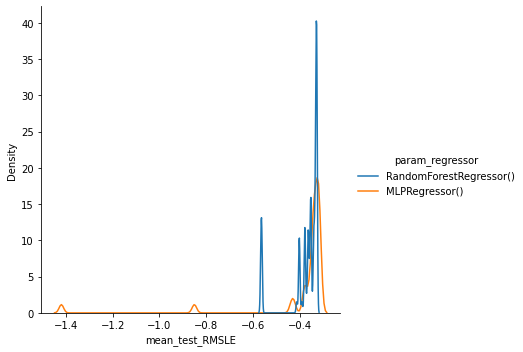

In [115]:
sns.displot(results_01_log[["mean_test_RMSLE", "param_regressor"]], x="mean_test_RMSLE", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

Нека да проверим как стоят нещата и с оценката R-squared:

In [116]:
results_01_log.sort_values(by=["mean_test_R-squared"], ascending=False)[["mean_test_R-squared", "params"]].head(8)

,mean_test_R-squared,params
80,0.939526,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 100, 'regressor__min_samples_split': 2}"
61,0.939256,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 50, 'regressor__min_samples_split': 4}"
51,0.939251,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 40, 'regressor__min_samples_split': 4}"
50,0.939245,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 40, 'regressor__min_samples_split': 2}"
60,0.939182,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 50, 'regressor__min_samples_split': 2}"
70,0.939098,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 70, 'regressor__min_samples_split': 2}"
30,0.938959,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 20, 'regressor__min_samples_split': 2}"
40,0.938721,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 30, 'regressor__min_samples_split': 2}"


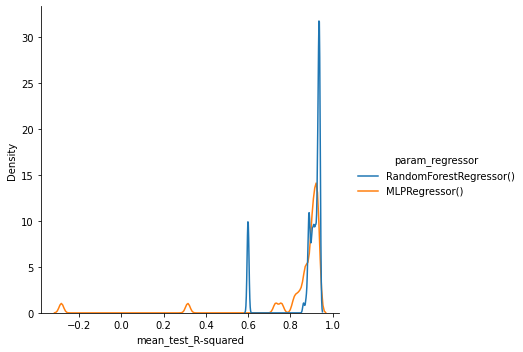

In [117]:
sns.displot(results_01_log[["mean_test_R-squared", "param_regressor"]], x="mean_test_R-squared", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

Изглежда, че както гората, така и невронната мрежа дават добри резултати и върху двете оценки. Все пак невронната мрежа има малка преднина за RMSLE, докато гората има доста малка преднина за R-squared.

#### Тестване с коренуване на целевата стойност

Да пробваме първо с логаритмуване на целевата стойност. Опитваме се да предскажем целевата стойност `target_sqrt_shuffled`, а оценките се  дават с функциите `rmsle_sqrt` и `r2_sqrt`.

Търсенето отнема около 40 минути.

След това правим същите операции както по-горе.

In [96]:
search_01_sqrt = GridSearchCV(estimator=pipe, param_grid=grid_01, refit=False, scoring={"RMSLE" : rmsle_sqrt, "R-squared" : r2_sqrt}, cv=4, n_jobs=4)
search_01_sqrt.fit(train_01_shuffled, target_sqrt_shuffled)

results_01_sqrt = pd.DataFrame(search_01_sqrt.cv_results_)
results_01_sqrt["features_transform"] = "[0,1]"
results_01_sqrt["target_transform"] = "sqrt"

results_01_sqrt.to_csv("data/Search Results/01_sqrt.csv", index=False)

Да видим кои са 8-те най-добри намерени модел спрямо RMSLE оценката:

In [97]:
results_01_sqrt.sort_values(by=["mean_test_RMSLE"], ascending=False)[["mean_test_RMSLE", "params"]].head(8)

,mean_test_RMSLE,params
119,-0.310694,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
110,-0.312389,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
101,-0.313416,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
113,-0.317583,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
98,-0.318740,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
116,-0.319938,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
109,-0.320074,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
117,-0.322535,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"


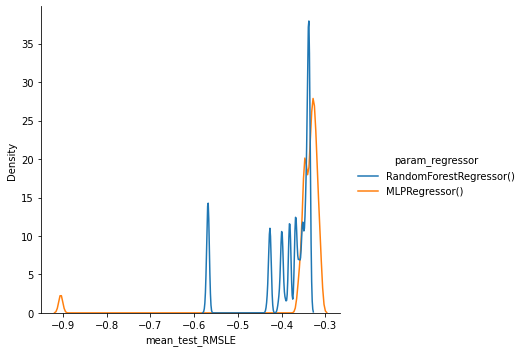

In [98]:
sns.displot(results_01_sqrt[["mean_test_RMSLE", "param_regressor"]], x="mean_test_RMSLE", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

И за R-squared оценката:

In [99]:
results_01_sqrt.sort_values(by=["mean_test_R-squared"], ascending=False)[["mean_test_R-squared", "params"]].head(8)

,mean_test_R-squared,params
117,0.945590,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
110,0.945050,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
98,0.944977,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
118,0.944946,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
114,0.944823,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
100,0.944444,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
99,0.943824,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
97,0.943767,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"


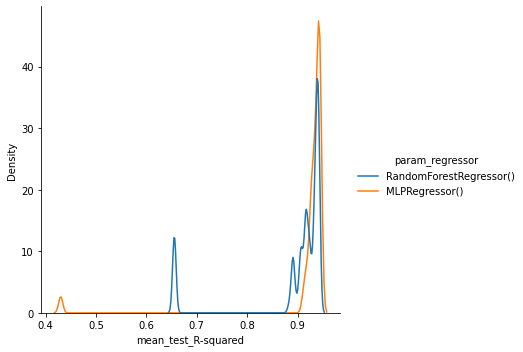

In [100]:
sns.displot(results_01_sqrt[["mean_test_R-squared", "param_regressor"]], x="mean_test_R-squared", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

И двата модела дават добри резултати, но невронната мрежа има преднина и при двете оценки. При RMSLE изглежда преднината е по-значима, докато при R-squared е малка.

### Тестване на трансформирането в единичната окръжност

Тук използваме характеристиките `train_cycles_shuffled` и търсим върху параметрите `grid_cycles`.

#### Тестване с логаритмуване на целевата стойност

Да пробваме първо с логаритмуване на целевата стойност. Опитваме се да предскажем целевата стойност `target_log_shuffled`, а оценките се  дават с функциите `rmsle_log` и `r2_log`.

Търсенето отнема около 40 минути.

In [123]:
search_cycles_log = GridSearchCV(estimator=pipe, param_grid=grid_cycles, refit=False, scoring={"RMSLE" : rmsle_log, "R-squared" : r2_log}, cv=4, n_jobs=4)
search_cycles_log.fit(train_cycles_shuffled, target_log_shuffled)

results_cycles_log = pd.DataFrame(search_cycles_log.cv_results_)
results_cycles_log["features_transform"] = "cycles"
results_cycles_log["target_transform"] = "log"

results_cycles_log.to_csv("data/Search Results/cycles_log.csv", index=False)

Да видим кои са 8-те най-добри намерени модел спрямо RMSLE оценката:

In [124]:
results_cycles_log.sort_values(by=["mean_test_RMSLE"], ascending=False)[["mean_test_RMSLE", "params"]].head(8)

,mean_test_RMSLE,params
180,-0.303893,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
181,-0.305071,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
191,-0.305478,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
189,-0.306055,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
182,-0.307303,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
186,-0.309057,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
170,-0.310195,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
196,-0.310477,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"


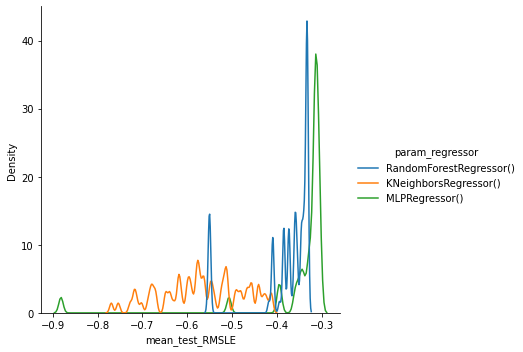

In [125]:
sns.displot(results_cycles_log[["mean_test_RMSLE", "param_regressor"]], x="mean_test_RMSLE", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

И за R-squared оценката:

In [126]:
results_cycles_log.sort_values(by=["mean_test_R-squared"], ascending=False)[["mean_test_R-squared", "params"]].head(8)

,mean_test_R-squared,params
191,0.941133,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
50,0.937693,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 40, 'regressor__min_samples_split': 2}"
170,0.937654,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
181,0.937561,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
71,0.937520,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 70, 'regressor__min_samples_split': 4}"
70,0.937490,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 70, 'regressor__min_samples_split': 2}"
189,0.937431,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
60,0.937378,"{'preprocessing': MinMaxScaler(), 'regressor': RandomForestRegressor(), 'regressor__max_depth': 50, 'regressor__min_samples_split': 2}"


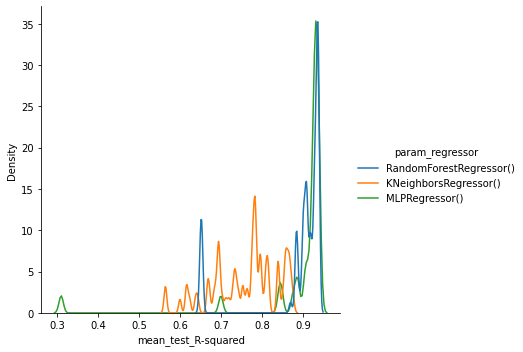

In [127]:
sns.displot(results_cycles_log[["mean_test_R-squared", "param_regressor"]], x="mean_test_R-squared", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

Тук кривата за KNeighbors е доста разхвърляна и при двете оценки. Все пак изглежда, че при подходящ избор на параметри може да се постигнат не лоши оценки, но те пак не могат да се мерят с гората и невронната мрежа. 

Невронната мрежа има преднина пред гората при RMSLE оценката, но за R-squared изглежда двата модела дават подобни резултати.

#### Тестване с коренуване на целевата стойност

Да пробваме първо с логаритмуване на целевата стойност. Опитваме се да предскажем целевата стойност `target_sqrt_shuffled`, а оценките се  дават с функциите `rmsle_sqrt` и `r2_sqrt`.

Търсенето отнема около 40 минути.

In [101]:
search_cycles_sqrt = GridSearchCV(estimator=pipe, param_grid=grid_cycles, refit=False, scoring={"RMSLE" : rmsle_sqrt, "R-squared" : r2_sqrt}, cv=4, n_jobs=4)
search_cycles_sqrt.fit(train_cycles_shuffled, target_sqrt_shuffled)

results_cycles_sqrt = pd.DataFrame(search_cycles_sqrt.cv_results_)
results_cycles_sqrt["features_transform"] = "cycles"
results_cycles_sqrt["target_transform"] = "sqrt"

results_cycles_sqrt.to_csv("data/Search Results/cycles_sqrt.csv", index=False)

Да видим кои са 8-те най-добри намерени модел спрямо RMSLE оценката:

In [102]:
results_cycles_sqrt.sort_values(by=["mean_test_RMSLE"], ascending=False)[["mean_test_RMSLE", "params"]].head(8)

,mean_test_RMSLE,params
181,-0.307829,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
185,-0.310836,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
170,-0.310858,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
183,-0.311088,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
197,-0.311896,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
182,-0.313036,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
180,-0.313237,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
172,-0.314973,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"


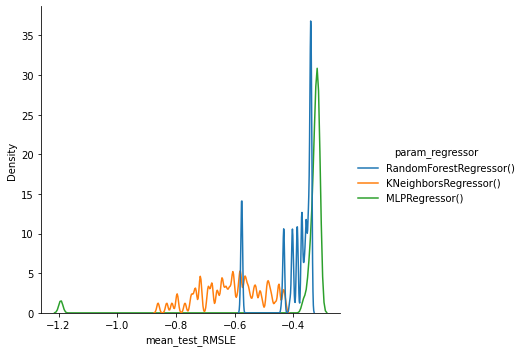

In [103]:
sns.displot(results_cycles_sqrt[["mean_test_RMSLE", "param_regressor"]], x="mean_test_RMSLE", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

И за R-squared оценката:

In [104]:
results_cycles_sqrt.sort_values(by=["mean_test_R-squared"], ascending=False)[["mean_test_R-squared", "params"]].head(8)

,mean_test_R-squared,params
184,0.949575,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
196,0.949118,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
181,0.949062,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
197,0.948969,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
185,0.948892,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
189,0.948673,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
173,0.948509,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
183,0.948455,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"


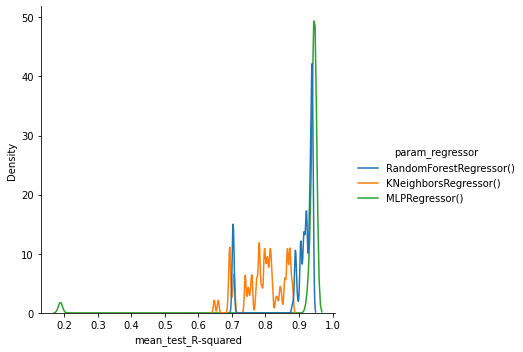

In [105]:
sns.displot(results_cycles_sqrt[["mean_test_R-squared", "param_regressor"]], x="mean_test_R-squared", hue="param_regressor", kind="kde", bw_adjust = 0.1, common_norm = False)

Отново KNeighbors има разхвърляна крива и резултатите са лоши. С нагласяване на параметрите може да се достигнат някакви прилични оценки.

Освен това изглежда, че невронната мрежа има преднина пред гората и при двете оценки. При RMSLE преднината е по-изразена, но и при R-squared е видима.

### Тестване на групирането в интервали

Тук използваме характеристиките `train_binned_shuffled` и търсим върху параметрите `grid_binned`.

#### Тестване с логаритмуване на целевата стойност

Да пробваме първо с логаритмуване на целевата стойност. Опитваме се да предскажем целевата стойност `target_log_shuffled`, а оценките се  дават с функциите `rmsle_log` и `r2_log`.

Търсенето отнема около 100 минути.

In [96]:
search_binned_log = GridSearchCV(estimator=pipe, param_grid=grid_binned, refit=False, scoring={"RMSLE" : rmsle_log, "R-squared" : r2_log}, cv=4, n_jobs=4)
search_binned_log.fit(train_binned_shuffled, target_log_shuffled)

results_binned_log = pd.DataFrame(search_binned_log.cv_results_)
results_binned_log["features_transform"] = "binned"
results_binned_log["target_transform"] = "log"

results_binned_log.to_csv("data/Search Results/binned_log.csv", index=False)

In [132]:
results_binned_log["param_regressor"] = results_binned_log["param_regressor"].astype(str)

Да видим кои са 8-те най-добри намерени модел спрямо RMSLE оценката:

In [133]:
results_binned_log.sort_values(by=["mean_test_RMSLE"], ascending=False)[["mean_test_RMSLE", "params"]].head(8)

,mean_test_RMSLE,params
326,-0.312746,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
317,-0.315079,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
325,-0.316572,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
315,-0.317255,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
338,-0.317617,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
316,-0.317715,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
324,-0.318388,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
49,-0.319061,"{'preprocessing': MinMaxScaler(), 'regressor': SVR(), 'regressor__C': 2, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf', 'regressor__max_iter': 5000}"


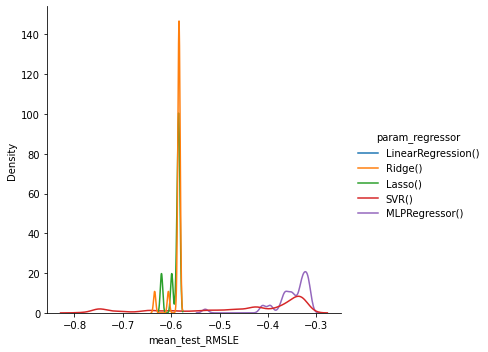

In [134]:
sns.displot(results_binned_log[["mean_test_RMSLE", "param_regressor"]][results_binned_log["mean_test_RMSLE"] > -0.8], x="mean_test_RMSLE", hue="param_regressor", kind="kde", bw_adjust = 0.3, common_norm = False, warn_singular=False)

И за R-squared оценката:

In [135]:
results_binned_log.sort_values(by=["mean_test_R-squared"], ascending=False)[["mean_test_R-squared", "params"]].head(8)

,mean_test_R-squared,params
52,0.938865,"{'preprocessing': MinMaxScaler(), 'regressor': SVR(), 'regressor__C': 2, 'regressor__gamma': 0.1, 'regressor__kernel': 'rbf', 'regressor__max_iter': 5000}"
49,0.938840,"{'preprocessing': MinMaxScaler(), 'regressor': SVR(), 'regressor__C': 2, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf', 'regressor__max_iter': 5000}"
42,0.938532,"{'preprocessing': MinMaxScaler(), 'regressor': SVR(), 'regressor__C': 1, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf', 'regressor__max_iter': 5000}"
344,0.937662,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
326,0.937382,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
46,0.937329,"{'preprocessing': MinMaxScaler(), 'regressor': SVR(), 'regressor__C': 1, 'regressor__gamma': 0.25, 'regressor__kernel': 'rbf', 'regressor__max_iter': 5000}"
58,0.936754,"{'preprocessing': MinMaxScaler(), 'regressor': SVR(), 'regressor__C': 5, 'regressor__gamma': 0.05, 'regressor__kernel': 'rbf', 'regressor__max_iter': 5000}"
78,0.936692,"{'preprocessing': StandardScaler(), 'regressor': SVR(), 'regressor__C': 1, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf', 'regressor__max_iter': 5000}"


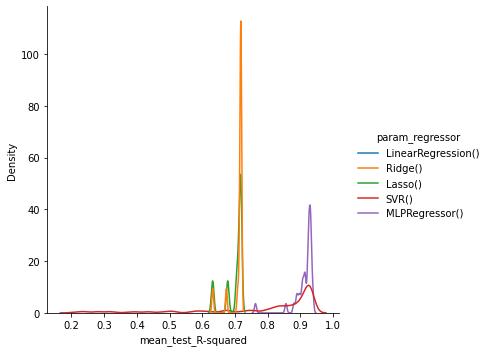

In [136]:
sns.displot(results_binned_log[["mean_test_R-squared", "param_regressor"]][results_binned_log["mean_test_R-squared"] > 0.2], x="mean_test_R-squared", hue="param_regressor", kind="kde", bw_adjust = 0.2, common_norm = False, warn_singular=False)

Виждаме, че линейните регресии се представят доста зле и различните видове регуларизация не помагат.

За сметка на това изглежда, че невронната мрежа и SVR се представят еднакво добре върху оценката R-squared, а невронната мрежа има малка преднина при оценката RMSLE. SVR обаче е по-чувстителен към параметрите на регуларизация и трябва по-внимателно да се нагласят, за да се получи добър резултат.

#### Тестване с коренуване на целевата стойност

Да пробваме първо с логаритмуване на целевата стойност. Опитваме се да предскажем целевата стойност `target_sqrt_shuffled`, а оценките се  дават с функциите `rmsle_sqrt` и `r2_sqrt`.

Търсенето отнема около 100 минути.

In [101]:
search_binned_sqrt = GridSearchCV(estimator=pipe, param_grid=grid_binned, refit=False, scoring={"RMSLE" : rmsle_sqrt, "R-squared" : r2_sqrt}, cv=4, n_jobs=4)
search_binned_sqrt.fit(train_binned_shuffled, target_sqrt_shuffled)

results_binned_sqrt = pd.DataFrame(search_binned_sqrt.cv_results_)
results_binned_sqrt["features_transform"] = "binned"
results_binned_sqrt["target_transform"] = "sqrt"

results_binned_sqrt.to_csv("data/Search Results/binned_sqrt.csv", index=False)

In [137]:
results_binned_sqrt["param_regressor"] = results_binned_sqrt["param_regressor"].astype(str)

Да видим кои са 8-те най-добри намерени модел спрямо RMSLE оценката:

In [138]:
results_binned_sqrt.sort_values(by=["mean_test_RMSLE"], ascending=False)[["mean_test_RMSLE", "params"]].head(8)

,mean_test_RMSLE,params
316,-0.310126,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
315,-0.313444,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
317,-0.316576,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
318,-0.323043,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
324,-0.323880,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
338,-0.326048,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
325,-0.326550,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
319,-0.327687,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"


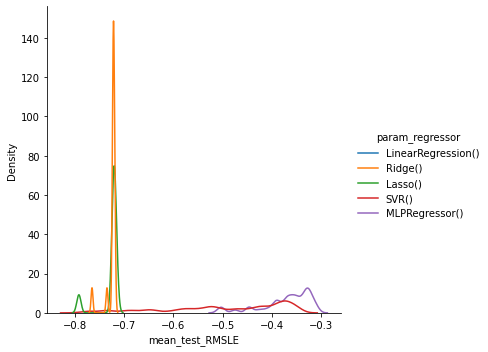

In [143]:
sns.displot(results_binned_sqrt[["mean_test_RMSLE", "param_regressor"]][results_binned_sqrt["mean_test_RMSLE"] > -0.8], x="mean_test_RMSLE", hue="param_regressor", kind="kde", bw_adjust = 0.3, common_norm = False, warn_singular=False)

И за R-squared оценката:

In [145]:
results_binned_sqrt.sort_values(by=["mean_test_R-squared"], ascending=False)[["mean_test_R-squared", "params"]].head(8)

,mean_test_R-squared,params
325,0.945303,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
324,0.944349,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
326,0.940440,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
316,0.940065,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"
330,0.939476,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
315,0.939380,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}"
317,0.938553,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}"
337,0.938523,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}"


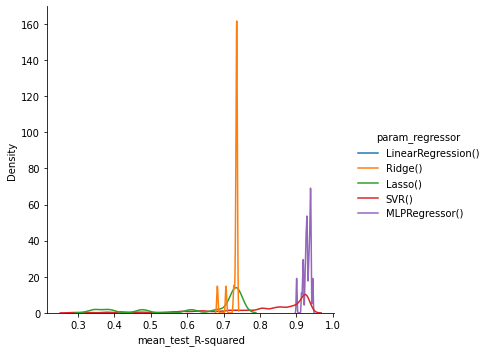

In [149]:
sns.displot(results_binned_sqrt[["mean_test_R-squared", "param_regressor"]][results_binned_sqrt["mean_test_R-squared"] > 0.2], x="mean_test_R-squared", hue="param_regressor", kind="kde", bw_adjust = 0.2, common_norm = False, warn_singular=False)

Виждаме, че отново линейната регресия се представя зле и регуларизацията не помага.

Също така невронната мрежа има видимо предимство пред SVR по отношение на RMSLE оценката, но предимството е доста по-малко за R-squared оценката. Отново SVR е по-чувствителен към параметрите на регуларизация и трябва внимателно да се подберат за получаване на добър резултат.

## Обобщение

Остана само да направим обобщение на резултатите. Нека да обединим шесте таблици и да видим кои са най-добре представящите се модели и за кои трансформации на характеристиките и целевата функция се постигат.

In [150]:
brief_01_log = pd.read_csv('data/Search Results/01_log.csv')[["mean_test_RMSLE", "mean_test_R-squared", "params", "features_transform", "target_transform"]]
brief_01_sqrt = pd.read_csv('data/Search Results/01_sqrt.csv')[["mean_test_RMSLE", "mean_test_R-squared", "params", "features_transform", "target_transform"]]
brief_cycles_log = pd.read_csv('data/Search Results/cycles_log.csv')[["mean_test_RMSLE", "mean_test_R-squared", "params", "features_transform", "target_transform"]]
brief_cycles_sqrt = pd.read_csv('data/Search Results/cycles_sqrt.csv')[["mean_test_RMSLE", "mean_test_R-squared", "params", "features_transform", "target_transform"]]
brief_binned_log = pd.read_csv('data/Search Results/binned_log.csv')[["mean_test_RMSLE", "mean_test_R-squared", "params", "features_transform", "target_transform"]]
brief_binned_sqrt = pd.read_csv('data/Search Results/binned_sqrt.csv')[["mean_test_RMSLE", "mean_test_R-squared", "params", "features_transform", "target_transform"]]

brief_results = pd.concat([brief_01_log, brief_01_sqrt, brief_cycles_log, brief_cycles_sqrt, brief_binned_log, brief_binned_sqrt])

Сега да сравним резултатите за всяка от оценките RMSLE и R-squared.

### RMSLE оценка

Нека да погледнем кои са 16-та най-добри резултата спрямо RMSLE оценката:

In [151]:
brief_results.drop(columns=["mean_test_R-squared"]).sort_values(by=["mean_test_RMSLE"], ascending=False).head(16)

,mean_test_RMSLE,params,features_transform,target_transform
180,-0.303893,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}",cycles,log
181,-0.305071,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",cycles,log
191,-0.305478,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}",cycles,log
189,-0.306055,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}",cycles,log
182,-0.307303,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}",cycles,log
181,-0.307829,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",cycles,sqrt
186,-0.309057,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}",cycles,log
316,-0.310126,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",binned,sqrt
170,-0.310195,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}",cycles,log
196,-0.310477,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",cycles,log


Виждаме, че всичките резултати са невронни мрежи. Освен това оценките са много близки като стойности.

По отношение на представянето на данните, цикличното представяне на характеристиките дава най-добри резултати, въпреки че и останалите представяния не са лоши за целите на задачата.

Относно представянето на целевата стойност, както логаритмуването, така и коренуването имат представителство. Все пак логаритмуването се среща повече от половината път и дава малко по-добри резултати.

За самите невронни мрежи най-често се среща активационните функции `tanh` и `logistic`, но и `relu` има представителство.

За скалирането на данните `StandardScaler` дава най-добри резултати, но и `MinMaxScaler` има някакво представителство. Може да забележим, че единствения ред с характеристики `binned` използва `MinMaxScaler`, та сигурно двете добре се съгласуват.

За размера на скритите слоеве няма ясна зависимост. И трите пробвани размера изглежда са достатъчно изразителни, за да научат закономерностите в данните. 

Също и параметъра на регуларизация `alpha` изглежда не е повлиял особено.

### R-squared оценка

Да видим каква е ситуацията и с 16-те най-добри модела спрямо R-squared оценката:

In [152]:
brief_results.drop(columns=["mean_test_RMSLE"]).sort_values(by=["mean_test_R-squared"], ascending=False).head(16)

,mean_test_R-squared,params,features_transform,target_transform
184,0.949575,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",cycles,sqrt
196,0.949118,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",cycles,sqrt
181,0.949062,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",cycles,sqrt
197,0.948969,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}",cycles,sqrt
185,0.948892,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}",cycles,sqrt
189,0.948673,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}",cycles,sqrt
173,0.948509,"{'preprocessing': MinMaxScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'tanh', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (150, 60, 30), 'regressor__max_iter': 500}",cycles,sqrt
183,0.948455,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.1, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}",cycles,sqrt
193,0.948451,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'relu', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (150, 60), 'regressor__max_iter': 500}",cycles,sqrt
180,0.948263,"{'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__activation': 'logistic', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (80, 40), 'regressor__max_iter': 500}",cycles,sqrt


Отново имаме само невронни мрежи сред най-добрите резултати. Също така пак резултатите са много близки помежду си.

Изглежда най-добрите представяния на характеристиките и целевата стойност са съответно цикличното представяне и коренуването.

За активационната функция, и трите вида са представени. Различните активационни функции дават само минимални разлики помежду си.

Отново изглежда, че `StandardScaler` дава по-добри резултати, но и `MinMaxScaler` има някакво представителство.

За размера на скритите слоеве и стойността на `alpha` отново няма ясна зависимост. Всичките варианти дават съпоставимо добри резултати.